In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import pandas as pd
df = pd.read_csv('/drive/My Drive/Colab Notebooks/data/kaggle_digits/Kaggle-digit-train.csv')

In [3]:
import pandas as pd
import re
import os
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
#check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [27]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Check the dataset


In [ ]:
#check categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


In [ ]:
#check numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

#print('The numerical variables are :', numerical)

There are 785 numerical variables



In [ ]:
# check missing values in numerical variables
df[categorical].isnull().sum()
# check missing values in numerical variables
df[numerical].isnull().sum()
#no missing values amoung all features

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)

# Preparation of the data

In [28]:
#name the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)

In [29]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
#normalization(Z-scoring)
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
X=sd.transform(X)

# kNN Classifier

In [36]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

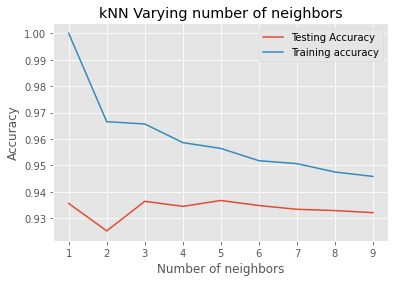

In [37]:
#Generate plot
plt.title('kNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#get the predictions using the classifier above
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# GridSearchCV

In [14]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = KNeighborsClassifier()

#parameter settings
parameters ={'n_neighbors':[3,4,5,6,7,8,9],
             'weights':['uniform', 'distance'],
             'p':[1,2],  
             'n_jobs':[-1]
}

## Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

knn_obj=GridSearchCV(model,parameters, scoring = acc_scorer, n_jobs = -1, cv=3)
knn_obj.fit(X_train, y_train)
model_final = knn_obj.best_estimator_
model_final

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [39]:
#get the predictions using the classifier we had fit above
model_final.fit(X_train, y_train)
model_final=KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
y_pred = model_final.predict(X_test)

In [40]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
model_final.score(X_test,y_test)

0.9364285714285714

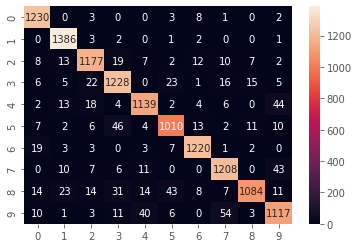

In [45]:
#heat map
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_test,model_final.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [41]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
True,,,,,,,,,,,
0.0,1230,0,3,0,0,3,8,1,0,2,1247
1.0,0,1386,3,2,0,1,2,0,0,1,1395
2.0,8,13,1177,19,7,2,12,10,7,2,1257
3.0,6,5,22,1228,0,23,1,16,15,5,1321
4.0,2,13,18,4,1139,2,4,6,0,44,1232
5.0,7,2,6,46,4,1010,13,2,11,10,1111
6.0,19,3,3,0,3,7,1220,1,2,0,1258
7.0,0,10,7,6,11,0,0,1208,0,43,1285
8.0,14,23,14,31,14,43,8,7,1084,11,1249


In [42]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1247
         1.0       0.95      0.99      0.97      1395
         2.0       0.94      0.94      0.94      1257
         3.0       0.91      0.93      0.92      1321
         4.0       0.94      0.92      0.93      1232
         5.0       0.92      0.91      0.91      1111
         6.0       0.96      0.97      0.97      1258
         7.0       0.93      0.94      0.93      1285
         8.0       0.97      0.87      0.91      1249
         9.0       0.90      0.90      0.90      1245

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600



# Learning Curves

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

67.52122020721436


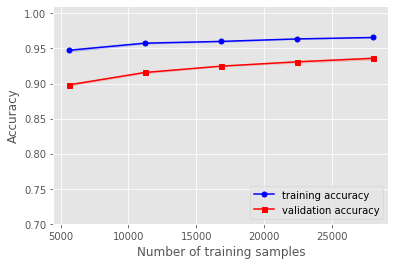

In [44]:
# kNN
import time
start = time.time()

pipe_knn = make_pipeline(StandardScaler(),  KNeighborsClassifier(n_neighbors=3))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn, X=X, y=y, cv=3,n_jobs=-1,train_sizes=[0.2,0.4,0.6,0.8,1.0],random_state=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths(GNB)
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.7, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)

## SVM

Preparation of dataset

In [5]:
#name the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#normalization(Z-scoring)
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
X=sd.transform(X)

SVM Classifier

In [12]:
#Tuning on C
#import Support Vector Classification
from sklearn.svm import SVC

#Setup arrays to store training and test accuracies
C = np.arange(start=0.1, stop=1.1, step=0.2)
train_accuracy =np.empty(len(C))
test_accuracy = np.empty(len(C))

for i,k in enumerate(C):
    #Setup a knn classifier with C=k
    svc = SVC(C=k,max_iter=100)
    
    #Fit the model
    svc.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = svc.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = svc.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

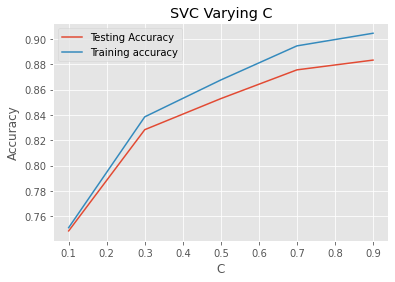

In [13]:
#Generate plot
plt.title('SVC Varying C')
plt.plot(C, test_accuracy, label='Testing Accuracy')
plt.plot(C, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [6]:
#performance on sleceted models
#import Support Vector Classification
from sklearn.svm import SVC
svc = SVC(C=0.8,max_iter=100)
svc.fit(X_train, y_train)
#get the predictions using the classifier fit above
y_pred = svc.predict(X_test)
svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.873968253968254

Accuracy is:  0.873968253968254


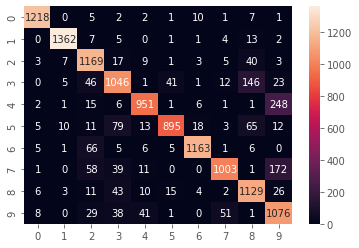

In [7]:
#confusion matrix
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score
ac = accuracy_score(y_test,svc.predict(X_test))
print('Accuracy is: ',ac)
cmgb = confusion_matrix(y_test,svc.predict(X_test))

#heat map
import seaborn as sns
sns.heatmap(cmgb,annot=True,fmt="d")

In [8]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1247
         1.0       0.98      0.98      0.98      1395
         2.0       0.82      0.93      0.87      1257
         3.0       0.82      0.79      0.80      1321
         4.0       0.91      0.77      0.84      1232
         5.0       0.93      0.81      0.86      1111
         6.0       0.96      0.92      0.94      1258
         7.0       0.93      0.78      0.85      1285
         8.0       0.80      0.90      0.85      1249
         9.0       0.69      0.86      0.77      1245

    accuracy                           0.87     12600
   macro avg       0.88      0.87      0.87     12600
weighted avg       0.88      0.87      0.87     12600



# Learning Curve

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


1474.9037055969238


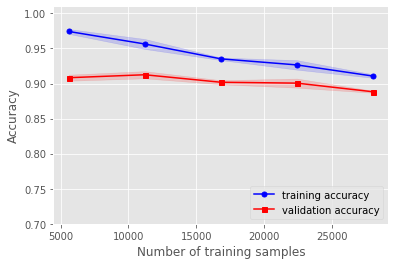

In [16]:
# SVC
import time
start = time.time()

pipe_svc = make_pipeline(StandardScaler(),  SVC(C=0.8,max_iter=100))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc, X=X, y=y, cv=3,n_jobs=-1,train_sizes=[0.2,0.4,0.6,0.8,1.0],random_state=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths(GNB)
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.7, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)